# Module 4 - Statistics For Machine Learning

## Module Overview

- Maximum Likelihood Estimate
- Outliers
- Regression Coefficients
    - The regression formula enables you to compute the coefficients of the best fitting line i.e., $y=ax+b$
    - **Regression Formula**
        - $b = (\bar{y}-a\bar{x})$
        - $a = \frac{\sum{(x_i-\bar{x})(y_i-\bar{y})}}{\sum{(x_i-x)^2}}$
        - where
            - $a$ is the regression coefficient (slope)
            - $b$ is the y-intercept
            - $x$ is the independent variable
            - $y$ is the dependent variable 
- Correlation Coefficients
    - $r = \frac{\sum_i^N (x_i - \bar{x})(y_i-\bar{y})}{\sqrt{\sum_i^N(x_i - \bar{x})^2}\sqrt{\sum_i^N(y_i-\bar{y})^2}}$
    - Correlation is a measure of co-movement and the number that lies between +1 and -1
    - Positive correlation (1 or +1): both variables move in tandem – in the same direction
    - Negative correlation (-1): the two variables move in opposite directions
- Bootstrapping
    - Creates sample datasets by randomly, repeatedly, sampling the same dataset 

## Learning outcomes

- LO1: Understand and conduct maximum likelihood estimation
- LO2: Detect outliers using quartiles
- LO3: Calculate regression and correlation coefficients
- LO4: Predict outcomes using regression calculations
- LO5: Understand and apply bootstrapping
- LO6: Understand descriptive statistics

## Misc and Keywords

### Descriptive Statistics

- **1. Measures of Central Tendancy**
    -  These describe the center, or typical value, of a dataset
    -  **Mean**
        - The average of the data
        - $\mu = \frac{\sum{x_i}}{N}$ 
    -  **Median**
        - The middle value when data is ordered
    -  **Mode**
        - The most frequently occuring value     
    -  If the mean < median then data is left skewed, and implies some low outliers. And vice versa.
- **2. Measures of Dispersion**
    - These describe the variability or spread of a dataset
    - **Range**
        - $\text{range} = max(x) - min(x)$
    - **Variance**
        - The average squared deviation from the mean ($\mu$)
        - $\sigma^2 = \frac{\sum{(x_i-\mu)^2}}{N} \text{(population)}$
        - $\sigma^2 = \frac{\sum{(x_i-\mu)^2}}{N-1} \text{(sample)}$
    - **Standard Deviation**
        - The square root of the variance, providing a measure in the same units as the data
        - $\text{standard deviation} = \sqrt{\sigma^2}$
    - **Coefficient of Variation (CV)**
        - The ratio of the standard deviation to the mean as a percent
        - $\text{CV} = \frac{Standard Deviation}{\mu}\cdot 100$
            - CV < 1: Lower relative variability
            - CV ≈ 1: High relative variability
            - CV > 1: Very high relative variability
- **3. Measure of Shape**
    - Used to describe the shape and symmetry of the dataset 
    - **Skewness**
        - $\text{skewness} = \frac{\frac{1}{N}\sum{(x_i - \mu)}}{\sigma^3}$
        - Measures the asymmetry of the distribution.
        - skewness > 0 = right skewed
        - skewness < 0 = left skewed
        - skeness = 0 = symmetric
    - **Modaility**
        - The number of peaks
        - **Unimodal** One peak
        - **Bimodal** Two peak
        - **Multimodal** More than two peaks
- **4. Measure of Position**
    - **Percentiles**
        - Values divide into 100 equal parts, the $k-th$ percentile is the value below the $k\%$ of the data falls
    - **Quartiles**
        - Special percentiles dividing data into four equal parts:
            - $Q_1$ = (25th percentile): Lower quartile.
            - $Q_2$ = (50th percentile): Median.
            - $Q_3$ = (75th percentile): Upper quartile.
    - **Deciles**
        - Divide data into 10 equal parts
    - **Z-Scores**
        - Measure how many standard deviations a data point is from the mean
        - $z = \frac{x - \bar{x}}{\text{standard deviation}}$          

## Introduction to Module Four

- Focus on statistics and how they can help you quantify different types of uncertainty

    

## Maximum Likelihood Estimation

- **Maximum Likelihood Estimation** (MLE) is a method used in statistics to figure out which values of a model's parameters are most likely to have produced the observed data.
- In mathematical terms, it finds the parameter values that make the observed data the most "likely" under the given model.
- Example:

True probability of heads: 0.7
MLE estimate after 100 flips: 0.700


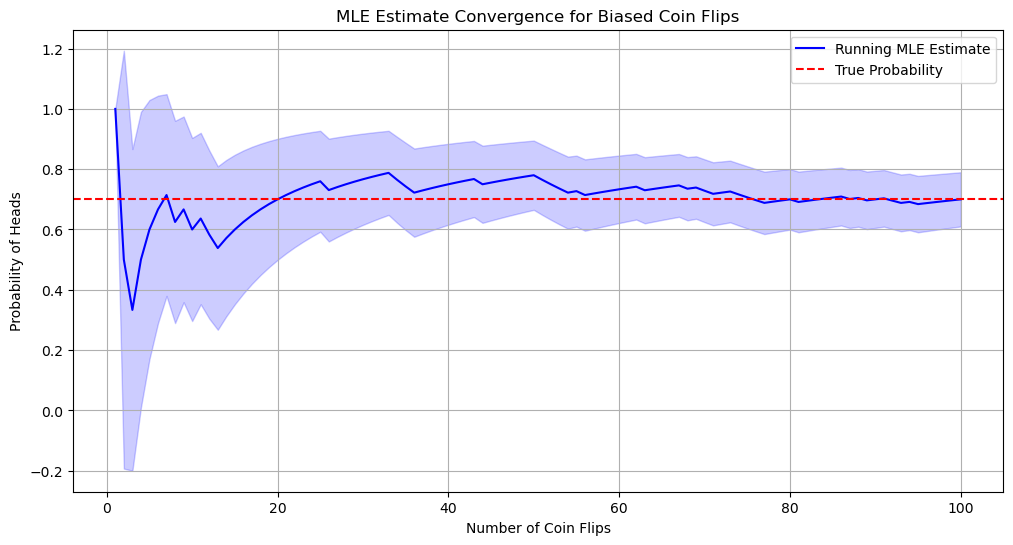

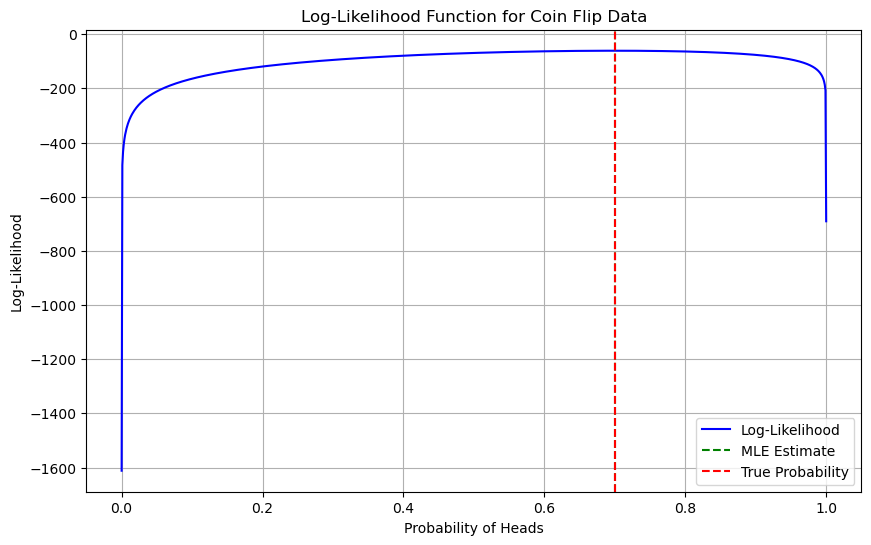

In [186]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Generate synthetic coin flip data
true_p = 0.7  # true probability of heads
n_flips = 100  # number of flips
np.random.seed(42)
flips = np.random.binomial(1, true_p, n_flips)  # 1 for heads, 0 for tails

# MLE estimate for Bernoulli distribution
# For coin flips, MLE is simply the proportion of heads
mle_p = np.mean(flips)

print(f"True probability of heads: {true_p}")
print(f"MLE estimate after {n_flips} flips: {mle_p:.3f}")

# Let's see how the MLE estimate converges
flip_indices = np.arange(1, n_flips + 1)
running_mle = np.cumsum(flips) / flip_indices

# Plotting
plt.figure(figsize=(12, 6))

# Plot running MLE
plt.plot(flip_indices, running_mle, 'b-', label='Running MLE Estimate')
plt.axhline(y=true_p, color='r', linestyle='--', label='True Probability')

plt.xlabel('Number of Coin Flips')
plt.ylabel('Probability of Heads')
plt.title('MLE Estimate Convergence for Biased Coin Flips')
plt.legend()
plt.grid(True)

# Add confidence intervals (optional)
confidence = 0.95
z = 1.96  # 95% confidence interval
standard_errors = np.sqrt(running_mle * (1 - running_mle) / flip_indices)
plt.fill_between(flip_indices, 
                 running_mle - z * standard_errors,
                 running_mle + z * standard_errors,
                 alpha=0.2,
                 color='b',
                 label='95% Confidence Interval')

plt.show()

# Calculate likelihood for different probability values
epsilon = 1e-10
p_values = np.linspace(epsilon, 1-epsilon, 1000)
n_heads = np.sum(flips)
n_tails = n_flips - n_heads
log_likelihood = n_heads * np.log(p_values) + n_tails * np.log(1 - p_values)

# Plot likelihood function
plt.figure(figsize=(10, 6))
plt.plot(p_values, log_likelihood, 'b-', label='Log-Likelihood')
plt.axvline(x=mle_p, color='g', linestyle='--', label='MLE Estimate')
plt.axvline(x=true_p, color='r', linestyle='--', label='True Probability')
plt.xlabel('Probability of Heads')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood Function for Coin Flip Data')
plt.legend()
plt.grid(True)
plt.show()

- This example (above) demonstrates several key concepts about MLE:
    - For a Bernoulli trial (coin flip), the MLE for the probability parameter is simply the proportion of successes (heads):
        - MLE = (number of heads) / (total number of flips)
    - The first plot shows:
        - How the MLE estimate converges as we collect more data
        - The true probability (red dashed line)
        - Confidence intervals around our estimate
    - The second plot shows:
        - The log-likelihood function for different probability values
        - The MLE estimate (green dashed line) occurs at the peak of the likelihood function
        - The true probability (red dashed line) for comparison

#### Maximum Likelihood Estimation (MLE) Formula

Let the observed data be $X = (x_1, x_2, \dots, x_n)$, and let the unknown parameter(s) be $\theta$.

1. The **likelihood function** $L(\theta | X)$ represents the probability of observing the data given the parameter(s) $\theta$. It is calculated as:

$$
L(\theta | X) = P(X | \theta) = \prod_{i=1}^{n} f(x_i | \theta)
$$

Where:
- $f(x_i | \theta)$ is the probability (or probability density) of observing $x_i$ given $\theta$.
- $\prod_{i=1}^{n}$ means the product over all the data points $x_1, x_2, \dots, x_n$.

2. **Log-likelihood function**: To simplify calculations, we often use the natural logarithm of the likelihood function. The log-likelihood function is:

$$
\ell(\theta | X) = \log L(\theta | X) = \sum_{i=1}^{n} \log f(x_i | \theta)
$$

3. To find the **Maximum Likelihood Estimate (MLE)**, we maximize the log-likelihood function with respect to $\theta$:

$$
\hat{\theta} = \arg \max_{\theta} \ell(\theta | X)
$$

Where $\hat{\theta}$ is the MLE of $\theta$, the value that maximizes the likelihood of the observed data.

## Outliers

- Often referred to as spurious points, or unlikely events
- One of the simplest tricks to remove outliers from a dataset is known as **quartiles**
- **Quartiles** take the median value, from this take 25% of the values to the left and right which are known as upper and lower quartiles respectively. The rest is discarded as outliers. To me this doesn't seem like a very good approach.
- In quartiles the first quartile (Q1) is the 25th percentile, Q2 is the 50th percentile (the median) and Q3 is the 75th percentile.
- Quartiles offer a simple summary of data spread and help identify trends and outliers.
- Alternatively there are **percentiles** which are much more granular and values can be divided into 100 different parts. So in this instance you could take the median and then 45% of the values to the left and the right of it.
- Percentiles are useful for precise rankings and comparisons within a dataset.

## Regression Coefficient

- The idea of **regression** is to fit a line that best describes the trend between two variables.
- An optimisation procedure known as least squares is applied to find the best line
- **Regression** aims to find a line that minimises the discrepancy between the assumed model and the data, that is, assume the following:
    - $(X_i, Y_i), i = 1, 2, ..., n$
    - $Y = ax + b$
        - where $a$ is the regression coefficient (slope)
        - $b$ is the y-intercept
        - $x$ is the independent variable
        - $y$ is the dependent variable 
- We then want to minimise the error (discrepancy), which is calculated as
    - $error = \sum{(ax_{i}+b-y_{i})}^2  = \sum{(\hat{y}_i - y_i)^2}$
    - The errors are squared so that they are not cancelled out when negative and such that large errors become even larger
    - The errors are technically measuring the differences between the line and the actual value
    - Want to minimise the sum of squared errors
- The regression coefficient formula is given by
    - offset, $b$, is given by the average deviation, so $b = \bar{y} - a\bar{x}$
    - where $\bar{y} = \frac{1}{N}\cdot \sum_{i=1}^{n}y_i$ and $\bar{x} = \frac{1}{N}\cdot \sum_{i=1}^{n}x_i$
    - and slope, $a = \frac{\sum_i{(x_i - \bar{x}_i)\cdot (y_i-\bar{y}_i)}}{\sum_i{(x_i - \bar{x}_i)^2}}$
- The numerator of $a$ is known as cross-correlation which means a correlation between two variables
- **Example**
    - Compute the regression coefficient for the given data set. X = 4, 3, 2, 7 and Y = 7, 9, 1, 11
    - when asked to compute the regression coefficients for a given dataset, it typically means to calculate the coefficients $a$ (the intercept) and $b$ (the slope) of the regression line in a simple linear regression

In [188]:
import numpy as np

X = np.array([0,1,2,3,4,5,6])
Y = np.array([0,55,120,188,252,307,366])

X_mean = np.average(X)
print("x_mean: ", X_mean)

Y_mean = np.average(Y)
print("y_mean: ", Y_mean)

x_mean:  3.0
y_mean:  184.0


In [189]:
a_numer = 0
a_denom = 0
for i in range(len(X)):
    a_numer += (X[i]-X_mean) * (Y[i]-Y_mean)
    a_denom += np.power((X[i] - X_mean), 2)
a = np.round(a_numer / a_denom, 4)
print("a: ", a)

a:  61.9286


In [190]:
b = np.round(Y_mean - (a*X_mean), 4)
print("b: ", b)

b:  -1.7858


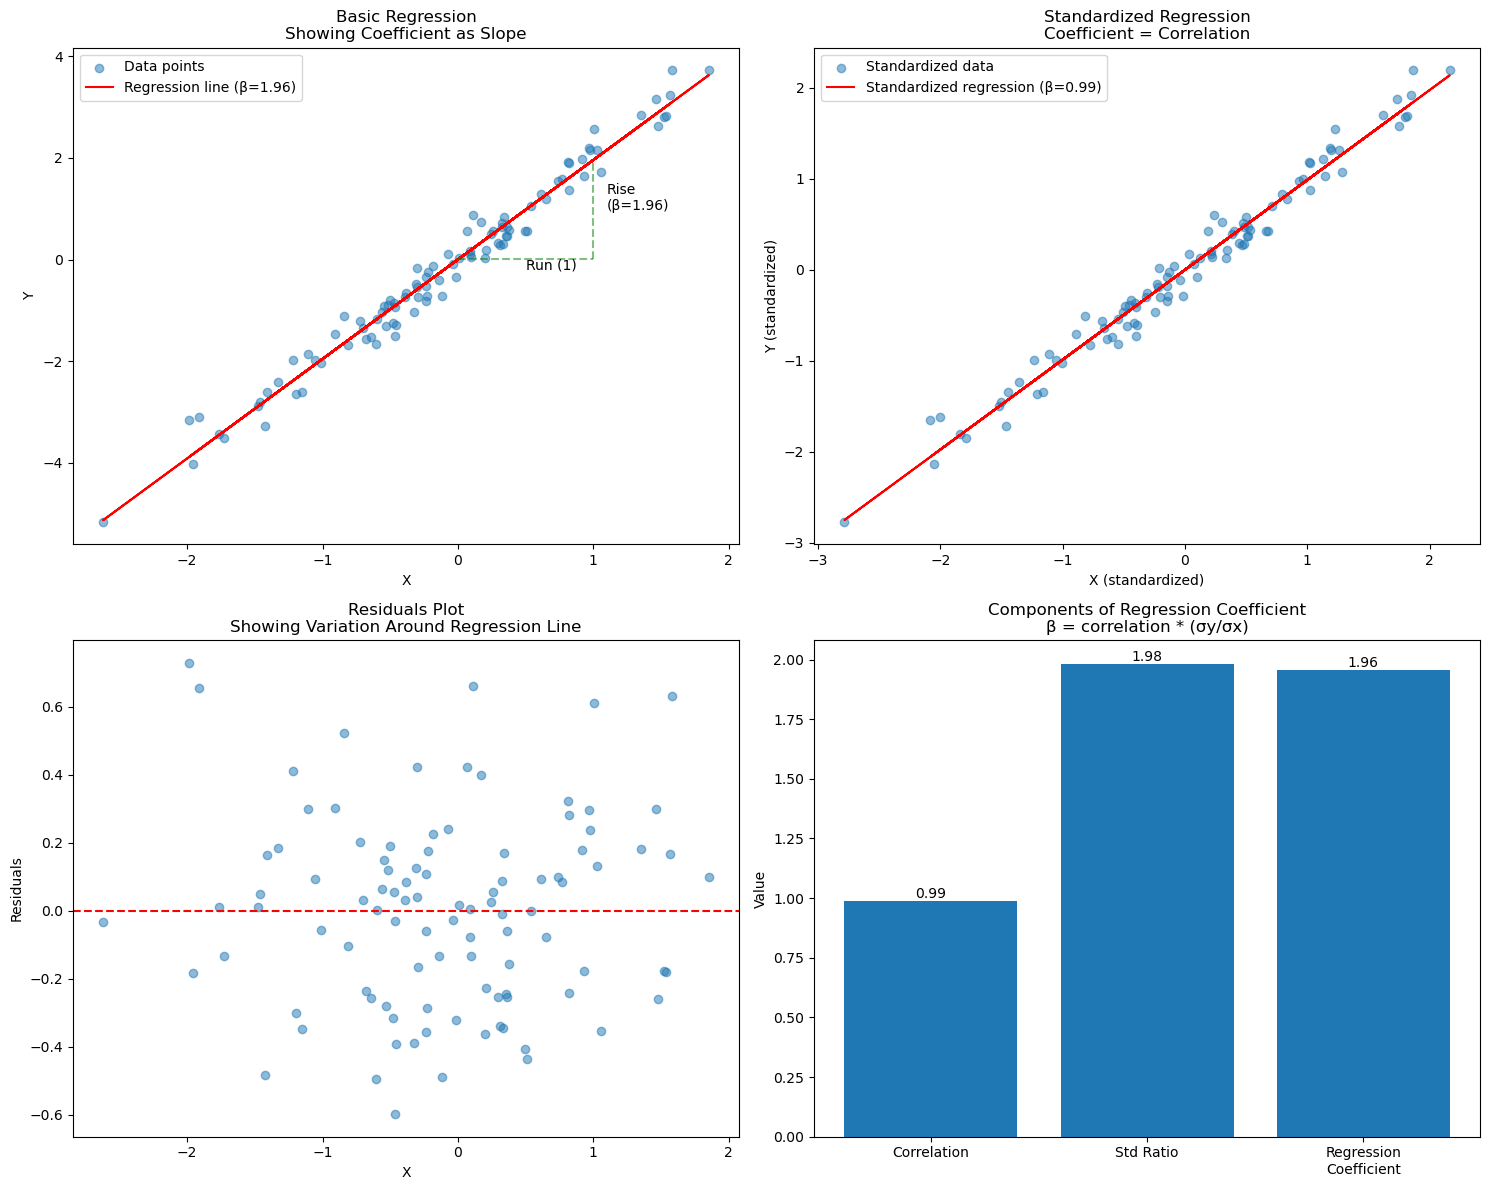

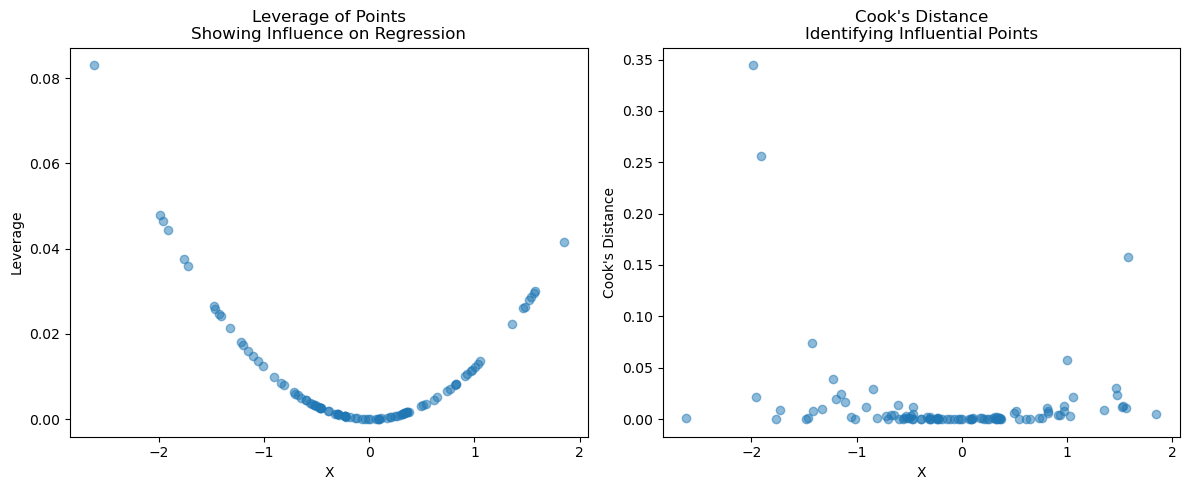


Summary Statistics:
Regression Coefficient (β): 1.957
Correlation: 0.988
Standard Deviation Ratio (σy/σx): 1.982
Standardized Coefficient: 0.988

Verification: correlation * (σy/σx) = 1.957


In [191]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)

# Generate sample data
n_samples = 100
x = np.random.normal(0, 1, n_samples)
noise = np.random.normal(0, 0.3, n_samples)
y = 2 * x + noise  # True relationship: y = 2x + noise

# Create figure with multiple subplots
plt.style.use('default')  # Using default style instead of seaborn
fig = plt.figure(figsize=(15, 12))

# 1. Basic Regression Plot
ax1 = plt.subplot(221)
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
beta = model.coef_[0]
alpha = model.intercept_

plt.scatter(x, y, alpha=0.5, label='Data points')
plt.plot(x, model.predict(x.reshape(-1, 1)), color='red', label=f'Regression line (β={beta:.2f})')
plt.title('Basic Regression\nShowing Coefficient as Slope')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Add slope triangle
x_point = 1
y_point = model.predict([[x_point]])[0]
plt.plot([x_point, x_point], [y_point-beta, y_point], 'g--', alpha=0.5)
plt.plot([x_point-1, x_point], [y_point-beta, y_point-beta], 'g--', alpha=0.5)
plt.annotate(f'Rise\n(β={beta:.2f})', xy=(x_point+0.1, y_point-beta/2))
plt.annotate('Run (1)', xy=(x_point-0.5, y_point-beta-0.2))

# 2. Standardized Variables
ax2 = plt.subplot(222)
x_std = (x - x.mean()) / x.std()
y_std = (y - y.mean()) / y.std()
model_std = LinearRegression()
model_std.fit(x_std.reshape(-1, 1), y_std)
beta_std = model_std.coef_[0]

plt.scatter(x_std, y_std, alpha=0.5, label='Standardized data')
plt.plot(x_std, model_std.predict(x_std.reshape(-1, 1)), color='red', 
         label=f'Standardized regression (β={beta_std:.2f})')
plt.title('Standardized Regression\nCoefficient = Correlation')
plt.xlabel('X (standardized)')
plt.ylabel('Y (standardized)')
plt.legend()

# 3. Residuals Plot
ax3 = plt.subplot(223)
residuals = y - model.predict(x.reshape(-1, 1))
plt.scatter(x, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot\nShowing Variation Around Regression Line')
plt.xlabel('X')
plt.ylabel('Residuals')

# 4. Correlation Components
ax4 = plt.subplot(224)
correlation = np.corrcoef(x, y)[0, 1]
std_ratio = y.std() / x.std()

# Create a bar plot showing components
components = ['Correlation', 'Std Ratio', 'Regression\nCoefficient']
values = [correlation, std_ratio, beta]
plt.bar(components, values)
plt.title('Components of Regression Coefficient\nβ = correlation * (σy/σx)')
plt.ylabel('Value')

# Add value labels on bars
for i, v in enumerate(values):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Additional plot for leverage and influence
plt.figure(figsize=(12, 5))

# 1. Leverage plot
plt.subplot(121)
leverage = np.diagonal(x.reshape(-1, 1) @ np.linalg.inv(x.reshape(-1, 1).T @ x.reshape(-1, 1)) @ x.reshape(-1, 1).T)
plt.scatter(x, leverage, alpha=0.5)
plt.title('Leverage of Points\nShowing Influence on Regression')
plt.xlabel('X')
plt.ylabel('Leverage')

# 2. Cook's distance
plt.subplot(122)
n = len(x)
p = 1  # number of predictors
mse = np.sum(residuals**2) / (n - p - 1)
h = np.diagonal(x.reshape(-1, 1) @ np.linalg.inv(x.reshape(-1, 1).T @ x.reshape(-1, 1)) @ x.reshape(-1, 1).T)
cooks_d = (residuals**2 / (p * mse)) * (h / (1 - h)**2)

plt.scatter(x, cooks_d, alpha=0.5)
plt.title("Cook's Distance\nIdentifying Influential Points")
plt.xlabel('X')
plt.ylabel("Cook's Distance")

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(f"Regression Coefficient (β): {beta:.3f}")
print(f"Correlation: {correlation:.3f}")
print(f"Standard Deviation Ratio (σy/σx): {std_ratio:.3f}")
print(f"Standardized Coefficient: {beta_std:.3f}")
print(f"\nVerification: correlation * (σy/σx) = {(correlation * std_ratio):.3f}")

## Variance vs Covariance: Why Variance is Squared but Covariance Isn't

### Variance:
- Variance measures the **spread of a single variable** around its mean.
- It is calculated as the **average of squared deviations** from the mean:

$\text{Variance of } X = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2$

- Squaring the deviations serves two purposes:
  1. **Positivity**: Squaring ensures all contributions to variance are positive, so variance reflects the magnitude of deviations without cancelling out positive and negative deviations.
  2. **Amplification**: Larger deviations are emphasized because squaring gives more weight to outliers.

### Covariance:
- Covariance measures the **relationship between two variables** and how they vary together.
- It is calculated as:

$ \text{Covariance of } X \text{ and } Y = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) $

- The formula includes the product of deviations, not their squares. Here's why:
  1. **Direction of Relationship**: The sign of the product \((x_i - \bar{x})(y_i - \bar{y})\) indicates whether the variables move together (positive covariance) or in opposite directions (negative covariance). Squaring would lose this directional information.
  2. **Symmetry**: Covariance treats $X$ and $Y$ symmetrically, reflecting their joint variability. The formula needs to maintain this symmetry.
  3. **No Need for Positivity**: Covariance is not solely about magnitude but also the direction of co-variation. It can be positive, negative, or zero, depending on how $X$ and $Y$ vary relative to each other.

### Why Not Square Covariance?
- If you squared the deviations in covariance, you would lose the crucial information about the direction of the relationship between $X$ and $Y$.
- The covariance would then only reflect the joint magnitude of deviations, making it harder to interpret the relationship.

### Summary:
- **Variance** uses squaring because it focuses on the magnitude of variability within a single variable.
- **Covariance** uses the product of deviations because it focuses on the relationship (both magnitude and direction) between two variables.

## Correlation Coefficients

- Is a measure of co-movement that shows how strongly two things (variables) are related to each other. 
- Correlation lies between -1 and +1, 1 is a strong positive correlation, -1 is a strong negative correlation and 0 is no correlation
- To compute the correlation coefficient:
    - $(x_i,y_i),$ $for$ $ i = (1, ..., N)$
    - $r = \frac{\sum_i^N (x_i - \bar{x})(y_i-\bar{y})}{\sqrt{\sum_i^N(x_i - \bar{x})^2}\sqrt{\sum_i^N(y_i-\bar{y})^2}}$

In [193]:
import numpy as np

x = [2, 4, 5] 
y = [8, 3, 7] 

x_mean = np.average(x)
print("x_mean: ", x_mean)

y_mean = np.average(y)
print("y_mean: ", y_mean)

x_mean:  3.6666666666666665
y_mean:  6.0


In [194]:
r_numerator = np.sum((x-x_mean)*(y-y_mean))
r_denominator = np.sqrt(np.sum(np.power(x-x_mean,2)))*np.sqrt(np.sum(np.power(y-y_mean,2)))

r = np.round(r_numerator / r_denominator, 6)
print("r: ", r)

r:  -0.371154


## Bootstrapping 

- Its a resampling technique used to determine the accuracy of the correlation coefficient between two time series samples
- In statistics and machine learning, bootstrapping refers to a method of creating many new datasets by sampling from an original dataset. These new datasets are created by randomly picking data points from the original set, with replacement (meaning the same data point can be picked more than once).
- **For example**: Imagine you have a bag of 10 marbles, each representing a piece of data. You want to understand the average size of these marbles, but you don’t want to just use the original 10. Instead, you randomly pick marbles from the bag, allowing you to pick the same marble more than once. You repeat this process many times (say 1,000 times), creating 1,000 different "new bags" of marbles. Each of these new bags will give you a slightly different average marble size.
- In machine learning, this technique helps create multiple models by training on these different "bootstrap" samples.
- **Why is it useful?**
    - Uncertainty estimation: Bootstrapping helps estimate how reliable or uncertain a model’s predictions are by creating multiple versions of the data and seeing how the model behaves on each.
    - Improves model stability: It allows a model to become more robust and less sensitive to the quirks of any single dataset.
So, bootstrapping in statistics and machine learning is a way of simulating different scenarios using your existing data to improve understanding, accuracy, and robustness.
- **Python Example**: Let's assume we have a small dataset, and we want to estimate the mean and create confidence intervals using bootstrapping.

Original Mean: 182.5
Bootstrap 95% Confidence Interval for the Mean: (174.0, 191.5)


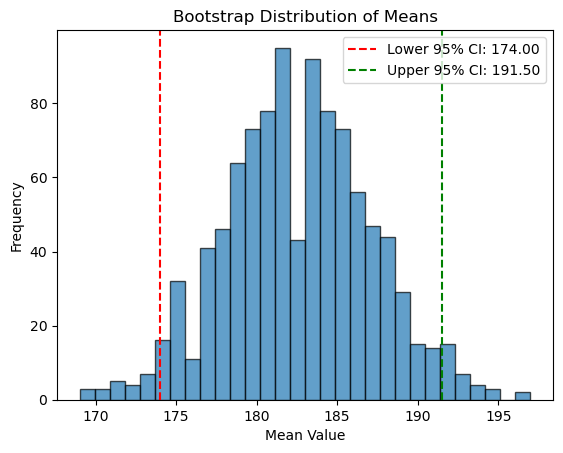

In [196]:
'''
Original dataset: We have a small dataset of 10 people's heights (in cm).

Bootstrapping: We generate 1,000 new samples by randomly sampling with replacement from the original dataset. 
    Each of these samples has the same size as the original dataset.
    
Calculate means: For each bootstrap sample, we calculate the mean and store it.

Confidence interval: From the 1,000 bootstrap means, we calculate the 2.5th and 97.5th percentiles to represent the 95% 
    confidence interval for the mean.
    
Visualization: We plot the distribution of bootstrap means and show the confidence interval on the graph.
'''
import numpy as np
import matplotlib.pyplot as plt

# Original dataset (for example, the heights of 10 people)
data = [160, 165, 170, 175, 180, 185, 190, 195, 200, 205]

# Bootstrapping parameters
n_iterations = 1000  # Number of bootstrap samples
n_size = len(data)  # Sample size (same as original dataset)

# Create an empty list to store the means of each bootstrap sample
bootstrap_means = []

# Perform bootstrapping
for _ in range(n_iterations):
    # Create a bootstrap sample by randomly sampling with replacement
    sample = np.random.choice(data, size=n_size, replace=True)
    # Calculate the mean of the sample and store it
    bootstrap_means.append(np.mean(sample))

# Convert the list to a numpy array for easier manipulation
bootstrap_means = np.array(bootstrap_means)

# Calculate the confidence interval (e.g., 95% confidence)
lower_percentile = np.percentile(bootstrap_means, 2.5)
upper_percentile = np.percentile(bootstrap_means, 97.5)

# Print the results
print(f"Original Mean: {np.mean(data)}")
print(f"Bootstrap 95% Confidence Interval for the Mean: ({lower_percentile}, {upper_percentile})")

# Plot the distribution of the bootstrap means
plt.hist(bootstrap_means, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(lower_percentile, color='red', linestyle='--', label=f'Lower 95% CI: {lower_percentile:.2f}')
plt.axvline(upper_percentile, color='green', linestyle='--', label=f'Upper 95% CI: {upper_percentile:.2f}')
plt.title('Bootstrap Distribution of Means')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Example Exercise 

You have now developed enough skills in probability to apply them to some real-life scenarios. To start, take on the challenge of guessing an elephant's weight using a simple data set.

You, along with 49 other people, have been asked to guess the weight of an adult male elephant. The table below shows all the guesses. Using this data set, answer the questions that follow.

Note: For this problem and the questions that follow, to avoid any ambiguity, you should use the sample standard deviation formula, but without the Bessel Correction (the n-1 in the denominator). Some calculators will use this correction since sample statistics tend to underestimate the population standard deviation.



In [198]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

def plot_distributions(data):
   fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
   # Suppress warnings by converting data to numpy array
   data = np.array(data)
    
   # Histogram with KDE for bimodal visualization
   sns.histplot(data=data, kde=True, ax=axes[0,0])
   axes[0,0].set_title('Histogram with KDE')
   axes[0,0].set_xlabel('Weight (lbs)')
   
   # Q-Q plot for normality
   stats.probplot(data, dist="norm", plot=axes[0,1])
   axes[0,1].set_title('Q-Q Plot')
   
   # Skewness visualization using boxplot
   sns.boxplot(data=data, ax=axes[1,0])
   axes[1,0].set_title('Boxplot (Skewness)')
   axes[1,0].set_xlabel('Weight (lbs)')
   
   # Density plot
   sns.kdeplot(data=data, ax=axes[1,1])
   axes[1,1].set_title('Density Plot')
   axes[1,1].set_xlabel('Weight (lbs)')
   
   plt.tight_layout()
   plt.show()

class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__


def calculate_stats(data):
   mean = np.mean(data)
   median = np.median(data)
   std = np.sqrt(np.sum((data - mean)**2) / len(data))  
   q1 = np.percentile(data, 4)
   q3 = np.percentile(data, 96)
   iqr = q3 - q1
   n = len(data) 
   cv = std / mean
   skew = stats.skew(data)
   mode = stats.mode(data, keepdims=False)
    
   return dotdict({
       'n': n,
       'mean': mean,
       'median': median,
       'std': std,
       'mode':mode,
       'q1': q1,
       'q3': q3,
       'iqr': iqr,
       'cv': cv,
       'skewness': skew,
       'min': np.min(data),
       'max': np.max(data)
   })

guesses = np.array([
    8319, 320, 12000, 4489, 12000, 13449, 10398, 7266, 10922, 6267,
    9034, 8449, 12308, 4959, 12280, 9353, 8470, 6353, 69420, 10450,
    12385, 5000, 12117, 10308, 5000, 5010, 6345, 10723, 23, 6873,
    13926, 12713, 11718, 9967, 6675, 5000, 6085, 11560, 8635, 11422,
    13809, 11819, 12005, 5804, 9751, 12416, 29232, 4411, 7726, 7300
])

guesses[0:10]

array([ 8319,   320, 12000,  4489, 12000, 13449, 10398,  7266, 10922,
        6267])

In [199]:
data_stats = calculate_stats(guesses)
data_stats

{'n': 50,
 'mean': 10445.28,
 'median': 9552.0,
 'std': 9482.909353231213,
 'mode': ModeResult(mode=5000, count=3),
 'q1': 4247.36,
 'q3': 14538.239999999987,
 'iqr': 10290.879999999986,
 'cv': 0.9078655003246645,
 'skewness': 4.875779126784121,
 'min': 23,
 'max': 69420}

The analysis of the original dataset (n=50) reveals significant concerns about estimation reliability, in particular, the disparity among central tendency measures raises concerns to warrant a lack of confidence in the cohorts guesses of weight using the data as is. The concerns stem from the high dispersion metrics and high positive skewness. Additionally, the substantial coefficient of variation (0.91) suggests fundamental inconsistency in estimation methodology among cohorts, and finally, the range (69,397) implies a large spread in data. The spread in estimates can be associated with some cohorts having either a lack of understanding of the question or lack of knowledge in this problem domain.

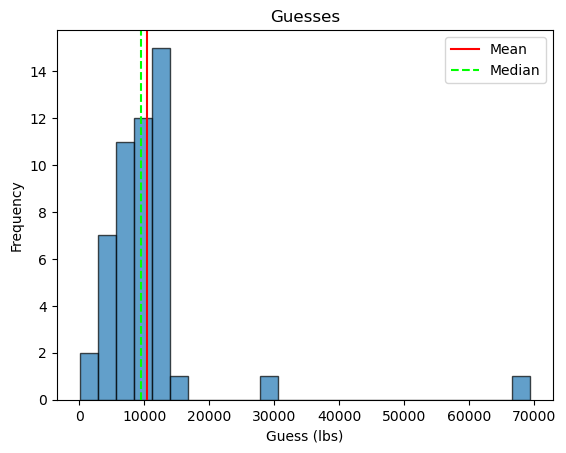

------------------------------------------------------------
First Quartile (Q1): 4247.36
Second Quartile (Median, Q2): 9552.0
Third Quartile (Q3): 14538.24


In [201]:
q1 = np.percentile(guesses, 4)  # First quartile (25th percentile)
q2 = np.percentile(guesses, 50)  # Second quartile (median or 50th percentile)
q3 = np.percentile(guesses, 96)  # Third quartile (75th percentile)

# Plot the distribution of the bootstrap means
plt.hist(guesses, bins=25, edgecolor='black', alpha=0.7)
plt.axvline(data_stats.mean, color=(1,0,0, 1), linestyle='-', label=f'Mean')
plt.axvline(data_stats.median, color=(0,1,0, 1), linestyle='--', label=f'Median')
plt.title('Guesses')
plt.xlabel('Guess (lbs)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("-"*60)
print("First Quartile (Q1):", round(q1,3))
print("Second Quartile (Median, Q2):", round(q2,3))
print("Third Quartile (Q3):", round(q3, 3))

In [202]:
# Count the number of elements in each quartile
q1_count = np.sum(guesses <= q1)  # Elements in Q1 or below
q2_count = np.sum((guesses > q1) & (guesses <= q2))  # Elements in Q2
q3_count = np.sum((guesses > q2) & (guesses <= q3))  # Elements in Q3
q4_count = np.sum(guesses > q3)  # Elements in Q4

q1_elements = guesses[guesses <=q1]
q4_elements = guesses[guesses > q3]

# Print the counts
print("-"*60)
print("Number of elements in Q1:", q1_count, q1_elements)
print("Number of elements in Q2:", q2_count)
print("Number of elements in Q3:", q3_count)
print("Number of elements in Q4:",q4_count, q4_elements)


------------------------------------------------------------
Number of elements in Q1: 2 [320  23]
Number of elements in Q2: 23
Number of elements in Q3: 23
Number of elements in Q4: 2 [69420 29232]


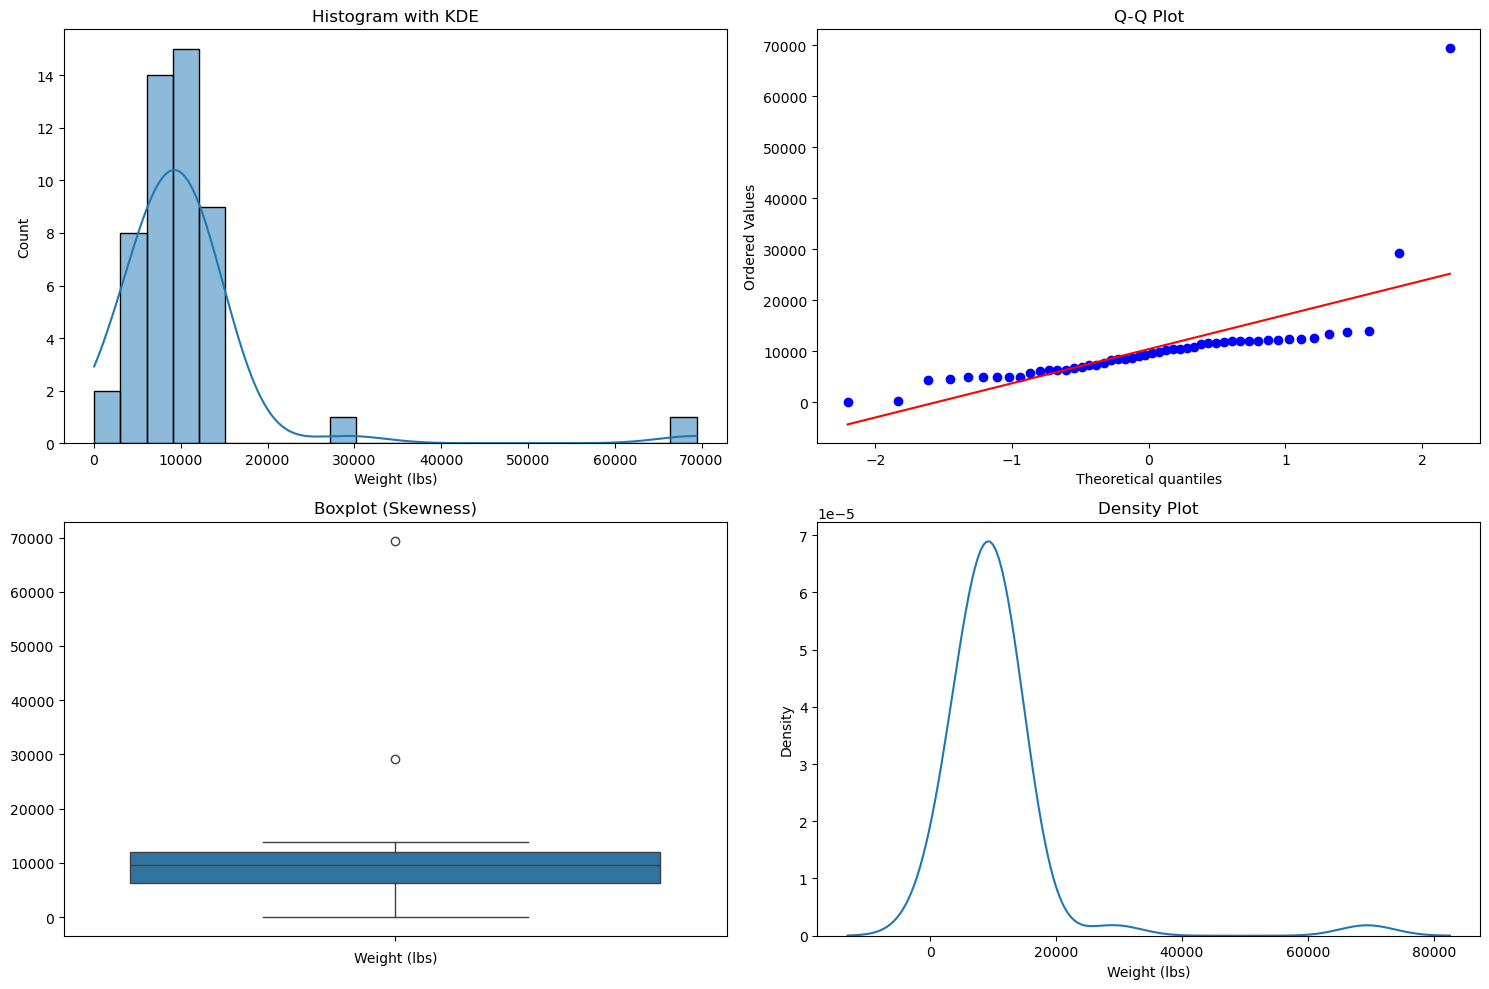

In [203]:
# Original data
plot_distributions(guesses)

With detailed statistical analysis of the data (Figure 2), several unusual characteristics that challenge the dataset's reliability can be identified. The distribution exhibits right skewness, shown by the mean (10,445.28 lbs) substantially exceeding the median (9,552.00 lbs). The density plot (Figure 2) further confirms this asymmetry, revealing a right-skewed distribution pattern that suggests extreme overestimation. Additionally, the dataset's variability is high, with the standard deviation (9,482.90 lbs) approaching the magnitude of the mean itself. This dispersion is further emphasised by the range between the minimum (23 lbs) and maximum (69,420 lbs) values.

The distribution's shape reveals additional concerns. A positive skewness (4.88) is clearly visible in the boxplot, while the Q-Q plot (Figure 2) identifies four significant outliers deviating substantially from normal distribution. 

In [205]:
guesses_updated = guesses[(guesses > q1) & (guesses <= q3)]

print("-------- Updated set --------")
data_stats_updated = calculate_stats(guesses_updated)
data_stats_updated

-------- Updated set --------


{'n': 46,
 'mean': 9201.5,
 'median': 9552.0,
 'std': 2885.546242839511,
 'mode': ModeResult(mode=5000, count=3),
 'q1': 4865.0,
 'q3': 13520.999999999998,
 'iqr': 8655.999999999998,
 'cv': 0.3135952010910733,
 'skewness': -0.1496423637924867,
 'min': 4411,
 'max': 13926}

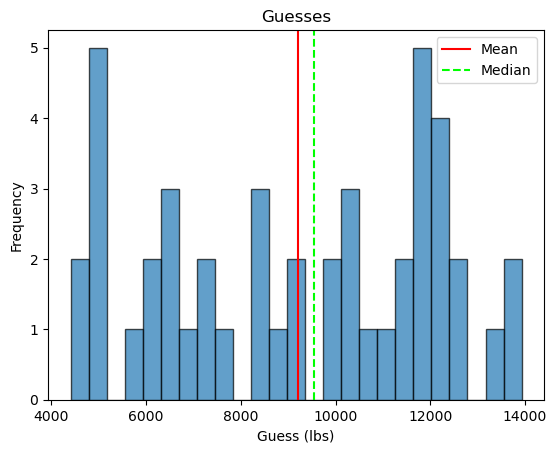

In [206]:
q1 = np.percentile(guesses_updated, 4)  # First quartile (25th percentile)
q2 = np.percentile(guesses_updated, 50)  # Second quartile (median or 50th percentile)
q3 = np.percentile(guesses_updated, 96)  # Third quartile (75th percentile)

# Plot the distribution of the bootstrap means
plt.hist(guesses_updated, bins=25, edgecolor='black', alpha=0.7)
plt.axvline(data_stats_updated.mean, color=(1,0,0, 1), linestyle='-', label=f'Mean')
plt.axvline(data_stats_updated.median, color=(0,1,0, 1), linestyle='--', label=f'Median')
plt.title('Guesses')
plt.xlabel('Guess (lbs)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

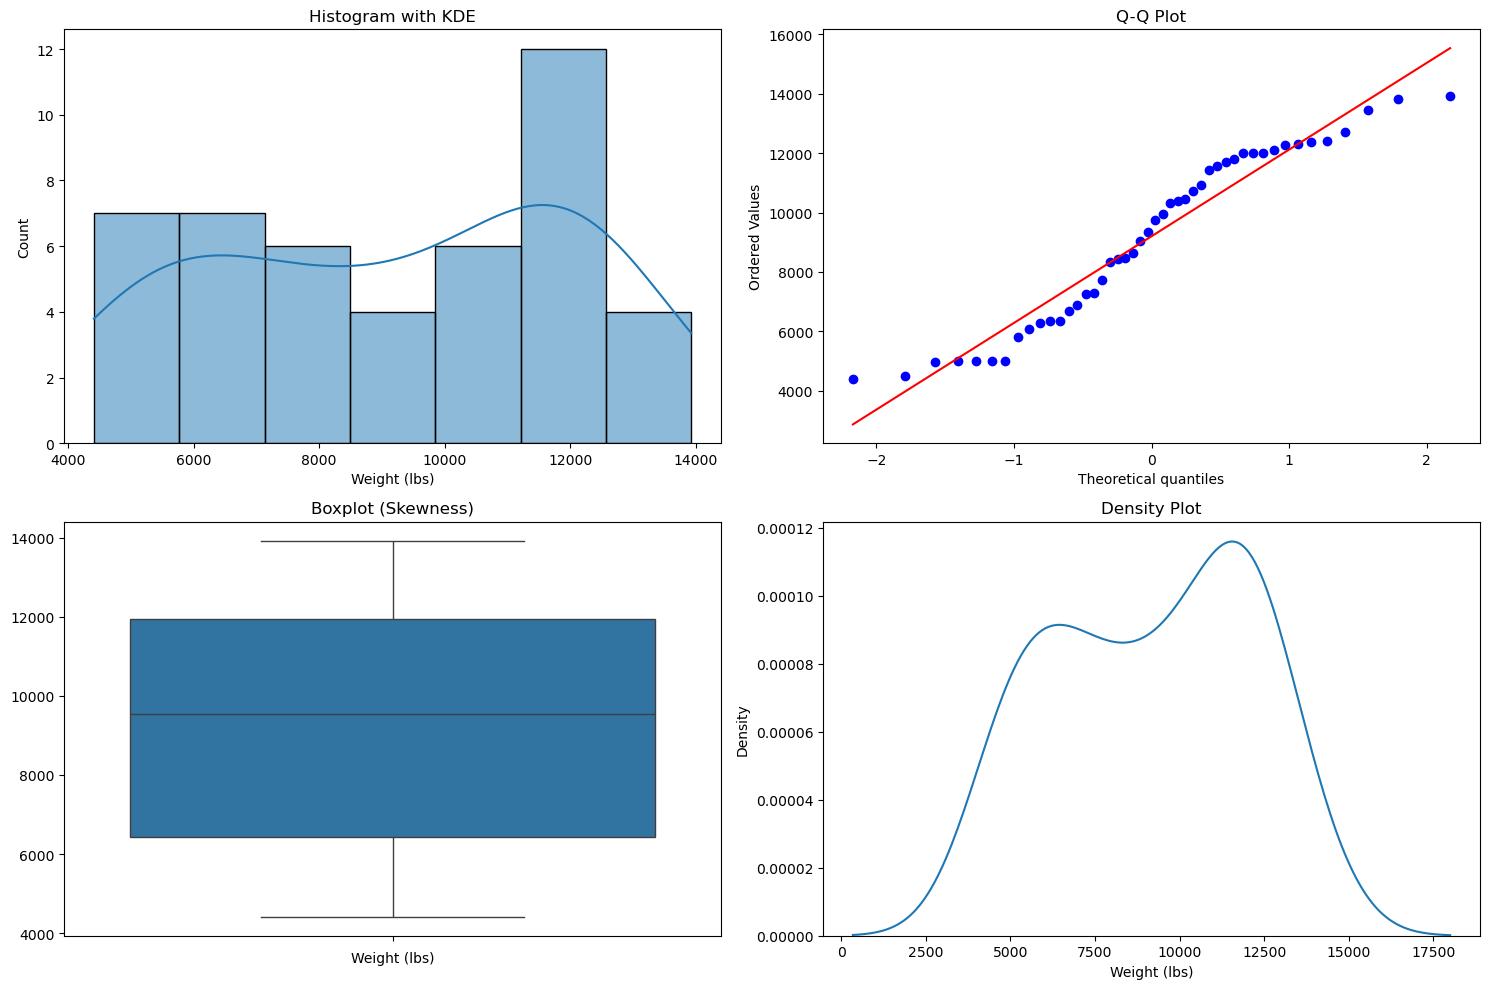

In [207]:
# Cleaned data
plot_distributions(guesses_updated)

From eliminating four outliers, (namely 23, 320, 29232 and 69420lbs), the data more accurately represents the consensus of the population. The mean and median converge, the standard deviation (2,885.55) has significantly decreased to approximately a third of its previous value (9,482.90), the coefficient of variation decreases from 0.91 to 0.31 indicating a more consistent dataset. Finally, the skewness reduces from 4.88 to a more normal distribution of -0.14.

The density plot (Figure 4) reveals a bimodal distribution, as opposed to the previous right skewed distribution, defined based on the two distinct peaks emerging around the 5,000 and 12,000lb. This distribution illustrates two distinct schools of thought amongst the cohorts. The Q-Q plot (Figure 4) illustrates better alignment with the normal distribution. Overall, it can be said that the removal of outliers dramatically improved the dataset's statistical properties.